In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

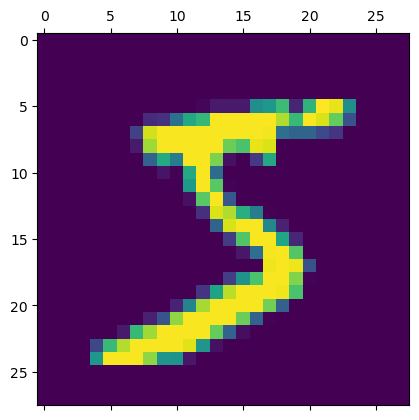

In [7]:
plt.matshow(X_train[0])

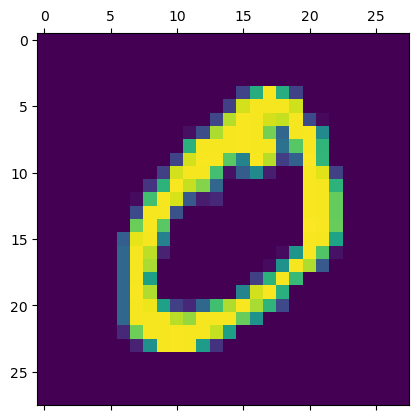

In [8]:
plt.matshow(X_train[1])

In [9]:
y_train[2]

4

In [10]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [11]:
# We need to flatten the X_train
X_train.shape

(60000, 28, 28)

In [12]:
X_train = X_train/255
X_test = X_test/255

In [13]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_train_flattened.shape

(60000, 784)

In [14]:
X_test_flattened = X_test.reshape(len(X_test),28*28)
X_test_flattened.shape

(10000, 784)

In [15]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation = "sigmoid")
])

model.compile(
        optimizer = "adam",
        loss = "sparse_categorical_crossentropy",
        metrics = ["accuracy"]
)
model.fit(X_train_flattened, y_train, epochs = 5)



Epoch 1/5


1875/1875 [==============================] - 14s 5ms/step - loss: 0.4692 - accuracy: 0.8759
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3040 - accuracy: 0.9145
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2837 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2732 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2664 - accuracy: 0.9255


In [16]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 2s 3ms/step - loss: 0.2692 - accuracy: 0.9228


[0.2692148983478546, 0.9228000044822693]

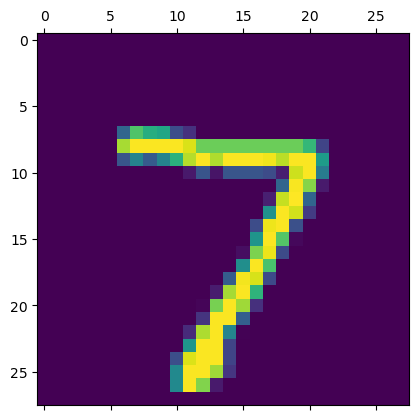

In [17]:
plt.matshow(X_test[0])

In [18]:
y_predicted = model.predict(X_test_flattened)

313/313 [==============================] - 2s 4ms/step


In [19]:
np.argmax(y_predicted[0])

7

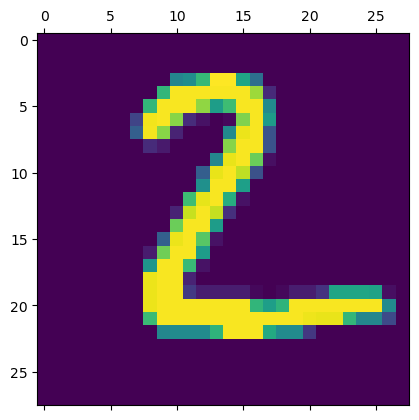

In [20]:
plt.matshow(X_test[1])

In [21]:
np.argmax(y_predicted[1])

2

In [22]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [23]:
cm = tf.math.confusion_matrix(labels = y_test,predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    1,    2,    0,    4,    5,    2,    1,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [  10,    9,  922,   19,    7,    1,   13,   10,   36,    5],
       [   4,    0,   18,  927,    0,   24,    3,   11,   14,    9],
       [   2,    2,    4,    2,  898,    0,   13,    4,    8,   49],
       [  12,    3,    2,   30,   10,  769,   20,    9,   30,    7],
       [  14,    3,    6,    1,    7,    9,  915,    2,    1,    0],
       [   1,    7,   23,    8,    4,    0,    0,  947,    1,   37],
       [  11,   12,    7,   30,    9,   25,   10,   12,  845,   13],
       [  11,    7,    1,   12,   22,    7,    0,   23,    4,  922]])>

Text(50.722222222222214, 0.5, 'Truth')

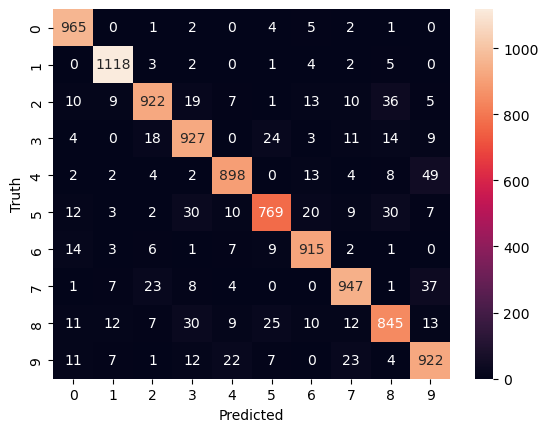

In [24]:
sns.heatmap(cm, annot=True, fmt = "d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [25]:
# Adding a hidden layer
model = keras.Sequential([
    keras.layers.Dense(100, input_shape= (784,), activation ="relu"),
    keras.layers.Dense(10, activation = "sigmoid")
])

model.compile (
        optimizer = "adam",
        loss = "sparse_categorical_crossentropy",
        metrics = ["accuracy"])

model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 12s 5ms/step - loss: 0.2758 - accuracy: 0.9223
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1282 - accuracy: 0.9627
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0894 - accuracy: 0.9735
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0683 - accuracy: 0.9792
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0545 - accuracy: 0.9829


In [26]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0925 - accuracy: 0.9712


[0.09250541776418686, 0.9711999893188477]

313/313 [==============================] - 1s 3ms/step


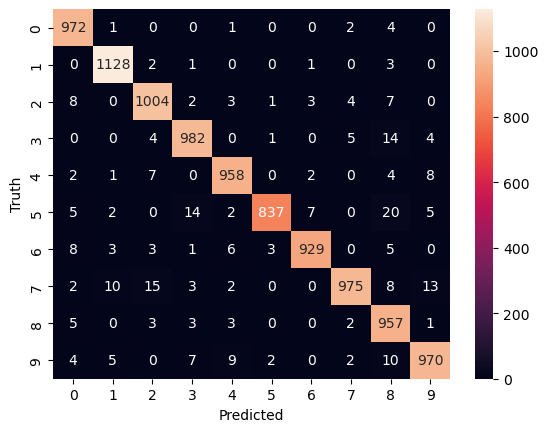

In [27]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

cm = tf.math.confusion_matrix(labels= y_test, predictions = y_predicted_labels)


sns.heatmap(cm, annot=True, fmt = "d")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()